<table><tbody><tr><th><p><img alt="Emblema" src="https://cdn6.aptoide.com/imgs/6/f/4/6f4821daa840da8fe971445350759fe5_icon.png" style="width:150px;"></p></th><th><p><strong>Inteligencia Artificial</strong></p><p><strong>Grado en Ingeniería Informática en Sistemas de Información – Curso 2024/2025</strong></p><p><strong>ENSEÑANZAS PRÁCTICAS Y DE DESARROLLO</strong></p><h1>EPD 5: Machine Learning - Clustering</h1></th></tr></tbody></table>

____

## Objetivos
- Implementación en Python de un algoritmo de clustering.

___

## Bibliografía Básica
- The elements of statistical learning: Data Mining, Inference and Prediction. Trevor Hastie, Robert Tibshirani, and Jerome Friedman. Springer, 2017. Disponible online en: https://web.stanford.edu/~hastie/ElemStatLearn

___

In [21]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

## Ejercicios
Implementar el algoritmo de clustering K-means para un dataset en 2D (fichero “ex7data2.mat”). Este algoritmo se basa en la idea de agrupar instancias similares en “clusters”. Se trata de un algoritmo iterativo que parte de unos centroides iniciales y los va refinando repetidamente agrupando las instancias en sus centroides más cercanos (EJ1) y recalculando los centroides (sus medias) en base a esas asignaciones (EJ2). Es importante tener en cuenta que las soluciones del K-means dependen de los centroides iniciales, es por eso que en la práctica en ocasiones se ejecuta el algoritmo varias veces con diferentes inicializaciones de los centroides y se selecciona la solución con el menor valor de la función objetivo que se está minimizando.

#### EJ01. 

Implementar la función findClosestCentroids para asignar cada instancia del conjunto de training a su centroide más cercano, partiendo de los siguientes centroides iniciales: [[3, 3], [6, 2], [8, 5]], es decir, K se inicializa a 3. Se usará la distancia euclídea para determinar qué centroide está más cerca. La función debe devolver un array de m enteros (siendo m el número de instancias del dataset). Cada elemento de dicho array tendrá un valor de 0 a K-1 representando el centroide asociado (recuerde que en Python los índices empiezan en 0).

##### Solución:

In [22]:
# computes the centroid memberships for every example
# cluster = FINDCLOSESTCENTROIDS (X, centroids) returns the closest centroids in cluster for a dataset X where each row is a single example. cluster = m x 1
# array of centroid assignments (i.e. each entry in range [1..K])
def findClosestCentroids(X, centroids):
    K = centroids.shape[0]
    cluster = [] # inicializo el vector de clusters
    for i in range(len(X)): # recorro cada dato de X
        dist_eu = []
        for j in range(K):
            dist_eu.append(np.sqrt(np.sum(np.abs(X[i] - centroids[j])**2)))
        cluster.append(np.argmin(dist_eu))
    return np.asarray(cluster)        

Finding closest centroids.




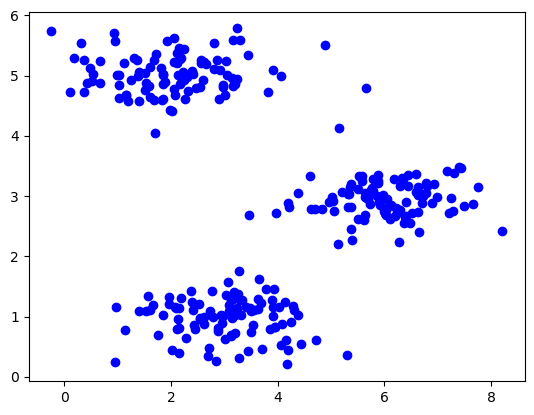

Closest centroids for the first 3 examples: 

[0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 0]


In [23]:
## ================= EJ1: Find Closest Centroids ====================
# To help you implement K-Means, we have divided the learning algorithm
# into two functions -- findClosestCentroids and computeCentroids. In this
# part, you should complete the code in the findClosestCentroids function.
#
# the closest centroids for the first 3 examples should be 0, 2, 1 respectively)
print('Finding closest centroids.\n\n')
X = sio.loadmat('ex7data2.mat')['X']

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], 'bo')
plt.show()

initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
K = 3
idx = findClosestCentroids(X, initial_centroids)
print('Closest centroids for the first 3 examples: \n')
print(idx)

#### EJ02.
Implementar la función computeCentroids para actualizar los centroides según la media de las instancias que fueron asignadas en el ejercicio anterior a cada centroide.

##### Solución:

In [24]:
from sklearn.cluster import KMeans

# returs the new centroids by computing the means of the data points assigned to each centroid.
# centroids = computeCentroids(X, clusters, K) returns the new centroids by computing the means of the data points assigned to each centroid. 
# It is given a dataset X where each row is a single data point, a vector clusters of centroid assignments (i.e. each entry in range [1..K]) for each example, and K, 
# the number of centroids. You should return a matrix centroids, where each row of centroids is the mean of the data points assigned to it.
#
def computeCentroids(X, clusters, K):
    centroids = np.zeros((K, X.shape[1]))
    for i in range(K):
        if np.sum(clusters == i) == 0:
            centroids[i] = X[np.random.randint(0, X.shape[0])]
        else:
            centroids[i] = np.mean(clusters[i], axis=0)
    return centroids

def computeCentroidsVec(X, clusters, K):
    centroids = np.zeros((K, X.shape[1]))
    for i in range(K):
        if np.sum(clusters == i) == 0:
            centroids[i] = X[np.random.randint(0, X.shape[0])]
        else:
            centroids[i] = np.mean(X[clusters == i], axis=0)
    return centroids

In [25]:
## ===================== EJ2: Compute Means =========================
# After implementing the closest centroids function, you should now
# complete the computeCentroids function.
# the centroids should be [ [2.428301 3.157924] [5.813503 2.633656] [7.119387 3.616684] ]
K = 3
centroids = computeCentroidsVec(X, idx, K)
print(centroids)


[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


#### EJ03.
Implementar la función runKmeans donde se llama a las dos funciones anteriores para ver cómo funciona el algoritmo usando los centroides iniciales especificados en el EJ1 y 10 iteraciones. Visualizar e interpretar los resultados: centroides iniciales vs. Centroides finales.

##### Solución:

In [26]:
def plotClusters(X,clusters,centroids,ini_centroids):
    # Assigning specific color to each cluster. Assuming 3 for now
    cols={0:'b',1:'g',2:'coral',3:'c',4:'lime'}
    fig,ax=plt.subplots()

    # Plots every cluster points
    for i in range(len(clusters)):
        ax.scatter(X[i][0],X[i][1],color=cols[clusters[i]], marker="+")

    # Plots all the centroids and mark them with a circle around
    for j in range(len(centroids)):
        # Plot current centroids with circle
        ax.scatter(centroids[j][0],centroids[j][1],color=cols[j]) # PONE UN PUNTO PARA EL FINAL
        ax.add_artist(plt.Circle((centroids[j][0], centroids[j][1]), 0.4, linewidth=2, fill=False)) # ARTIST LE PONE UN CIRCULO
        # Plot initial centroids with ^ and circle in yellow
        ax.scatter(ini_centroids[j][0],ini_centroids[j][1],marker="^",s=150,color=cols[j]) # PONE UN ^ PARA EL INICIAL
        ax.add_artist(plt.Circle((ini_centroids[j][0], ini_centroids[j][1]), 0.4, linewidth=2, color='y', fill=False))

    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_title("K-means Clustering")
    plt.show()

In [27]:
# runs the K-Means algorithm on data matrix X, where each row of X is a single example
# [centroids, idx] = runKmeans(X, initial_centroids, max_iters, ... plot_progress) runs the K-Means algorithm on data matrix X, where each row of X is a single example. 
# It uses initial_centroids used as the initial centroids. max_iters specifies the total number of interactions of K-Means to execute. plot_progress is a true/false flag that
# indicates if the function should also plot its progress as the learning happens. This is set to false by default. runkMeans returns centroids, 
# a Kxn matrix of the computed centroids and idx, a m x 1 vector of centroid assignments (i.e. each entry in range [1..K])
#

def runKmeans(X, initial_centroids, max_iters, plot=False):
    centroids = initial_centroids
    K = initial_centroids.shape[0]
    for i in range(max_iters):
        print("Iteracion ",i)
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroidsVec(X, idx, K)
        print(centroids)
        if plot:
            plotClusters(X, idx, centroids, initial_centroids)
    return centroids, idx

def runKmeansWithRegularization(X, initial_centroids, max_iters, plot=False, reg_param=0.1):
    centroids = initial_centroids
    K = initial_centroids.shape[0]
    for i in range(max_iters):
        print("Iteracion ", i)
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroidsVec(X, idx, K)
            
        # Apply regularization
        centroids = (1 - reg_param) * centroids + reg_param * initial_centroids
            
        print(centroids)
        if plot:
            plotClusters(X, idx, centroids, initial_centroids)
    return centroids, idx

Iteracion  0
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


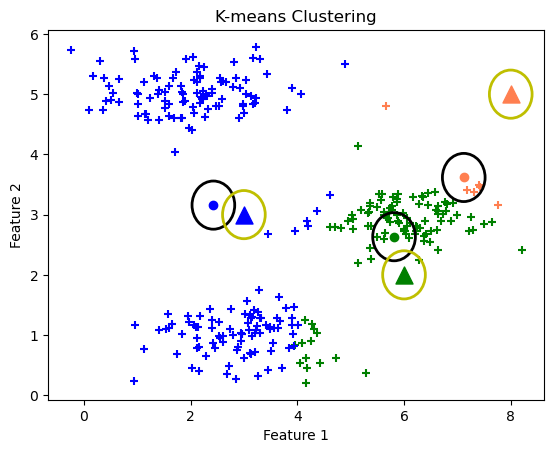

Iteracion  1
[[2.31325526 3.22830617]
 [5.33273768 2.43159599]
 [6.8653618  3.23293995]]


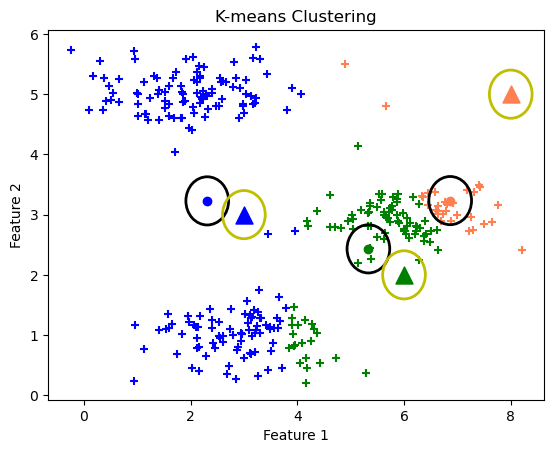

Iteracion  2
[[2.19692479 3.42136707]
 [4.83555397 2.12976745]
 [6.6560054  3.0751355 ]]


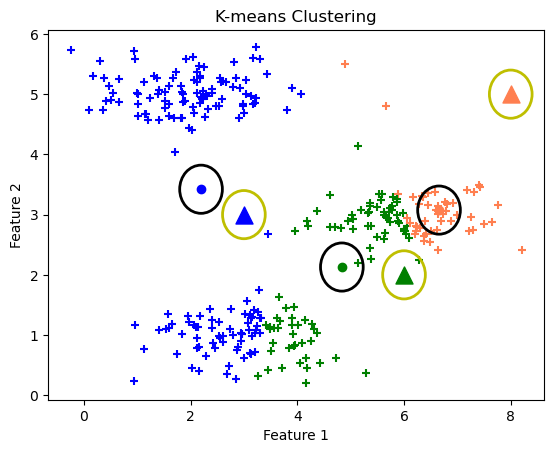

In [28]:
## =================== EJ3: K-Means Clustering ======================
# After you have completed the two functions computeCentroids and
# findClosestCentroids, you have all the necessary pieces to run the
# kMeans algorithm. In this part, you will run the K-Means algorithm on
# the example dataset we have provided.
#
centroids, idx = runKmeans(X, initial_centroids, 3, True)

#### EJ04.
Existen algoritmos que buscan la inicialización óptima de los centroides, como el K-Means++. En este caso, implemente una inicialización los centroides seleccionando al azar K instancias del conjunto de entrenamiento implementando la función kMeansInitCentroids. Se recomienda modificar aleatoriamente los datos usando randint de numpy y seleccionar las K instancias. Después volver a ejecutar el algoritmo completo y ver cómo varían los centroides encontrados.

##### Solución:

In [29]:
# This function initializes K centroids that are to be used in K-Means on the dataset X
# centroids = kMeansInitCentroids(X, K) returns K initial centroids to be used with the K-Means on the dataset X
#
def kMeansInitCentroids(X, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    idx = np.random.randint(0, m, K)
    for i in range(K):
        centroids[i] = X[idx[i]]
    return np.asarray(centroids)
  

In [30]:
## =================== EJ4: Setting random initial centroids ======================
# Setting centroids to random examples of the training data
centroids = kMeansInitCentroids(X, 4)
print(centroids)

[[1.12993856 0.77085284]
 [2.39775807 1.24721387]
 [3.95549912 0.83269299]
 [5.03611162 2.92486087]]


#### EJ05.
Implementar el algoritmo elbow en la función elbowMethod para determinar cuál sería el K óptimo para este conjunto de datos. Pruebe con K desde 1 hasta 10. Visualice la gráfica función coste versus número de clusters.

##### Solución:

In [31]:
def elbowMethod(X, max_K):
    J = []
    m = X.shape[0]
    for K in range(1, max_K):
        suma = 0
        init_centroid = kMeansInitCentroids(X, K)
        centroids, idx = runKmeans(X, init_centroid, 10)
        for i in range(m):
            suma += np.sqrt(np.sum(X[i] - centroids[int(idx[i])])**2)
        J.append(suma/m)
    plt.plot(J)
    plt.show()
        
        


Iteracion  0
[[3.68437558 2.9871008 ]]
Iteracion  1
[[3.68437558 2.9871008 ]]
Iteracion  2
[[3.68437558 2.9871008 ]]
Iteracion  3
[[3.68437558 2.9871008 ]]
Iteracion  4
[[3.68437558 2.9871008 ]]
Iteracion  5
[[3.68437558 2.9871008 ]]
Iteracion  6
[[3.68437558 2.9871008 ]]
Iteracion  7
[[3.68437558 2.9871008 ]]
Iteracion  8
[[3.68437558 2.9871008 ]]
Iteracion  9
[[3.68437558 2.9871008 ]]
Iteracion  0
[[2.64646979 1.68297049]
 [4.40563215 3.89336084]]
Iteracion  1
[[2.7528458  1.44466702]
 [4.25531319 3.93246343]]
Iteracion  2
[[3.0058623  1.03510563]
 [4.03391272 3.99267406]]
Iteracion  3
[[3.03033557 0.98166827]
 [4.01139559 3.98981706]]
Iteracion  4
[[3.03033557 0.98166827]
 [4.01139559 3.98981706]]
Iteracion  5
[[3.03033557 0.98166827]
 [4.01139559 3.98981706]]
Iteracion  6
[[3.03033557 0.98166827]
 [4.01139559 3.98981706]]
Iteracion  7
[[3.03033557 0.98166827]
 [4.01139559 3.98981706]]
Iteracion  8
[[3.03033557 0.98166827]
 [4.01139559 3.98981706]]
Iteracion  9
[[3.03033557 0.981668

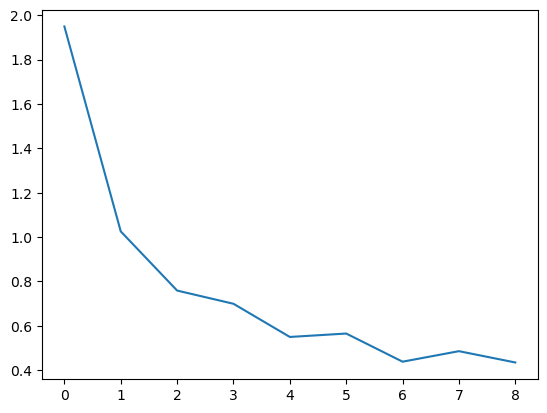

In [32]:
## =================== EJ5: Elbow Method ======================
elbowMethod(X, 10)

## Problemas

#### PROBLEMA 01.
Implementar el algoritmo K-Means usando la librería sklearn con el método “k-means++” para inicializar los centroides. Uitlice los mismos datos que en los Ejercicios. Completar el código para poder determinar el número óptimo de clusters para el conjunto de datos tanto de forma visual como numéricamente con la librería kneed. De forma visual, consiste en dibujar los valores de la función objetivo que se minimiza (a los que accedemos mediante el atributo .inertia_ ) para los valores de K desde 1 hasta 10. De forma numérica, puede consultar el uso de la librería kneed en: https://kneed.readthedocs.io/en/stable/

##### Solución:

c:\Users\danit\anaconda3\envs\entornoIA2425\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\danit\anaconda3\envs\entornoIA2425\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\danit\anaconda3\envs\entornoIA2425\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\danit\anaconda3\envs\entornoIA2425\lib\site-packages\sklearn\cluster\_

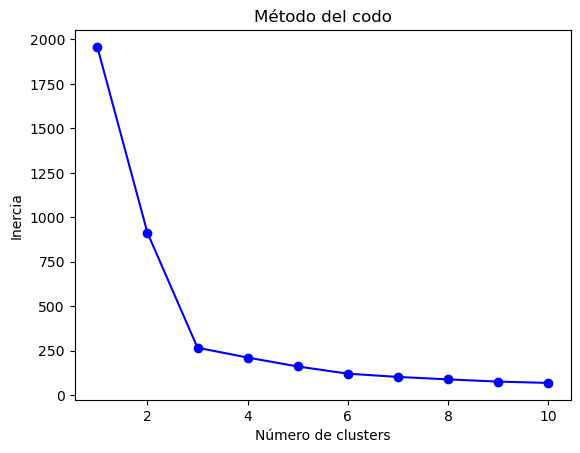

Número óptimo de clusters: 3


In [33]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

# Implementar el algoritmo K-Means usando sklearn
def kmeans_sklearn(X, max_K):
    inertias = []
    for k in range(1, max_K + 1):
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
    
    # Visualizar la gráfica función coste versus número de clusters
    plt.plot(range(1, max_K + 1), inertias, 'bo-')
    plt.xlabel('Número de clusters')
    plt.ylabel('Inercia')
    plt.title('Método del codo')
    plt.show()
    
    # Determinar el número óptimo de clusters usando kneed
    kneedle = KneeLocator(range(1, max_K + 1), inertias, curve='convex', direction='decreasing')
    optimal_k = kneedle.elbow
    print(f'Número óptimo de clusters: {optimal_k}')
    
    return optimal_k

# Determinar el número óptimo de clusters para el conjunto de datos
optimal_k = kmeans_sklearn(X, 10)

#### PROBLEMA 02.
Se usará el algoritmo K-Means implementado en los ejercicios anteriores (EJ1-EJ4) para comprimir una imagen (“bird_small.mat”). La imagen está codificada con RGB encoding (255 valores) y se pretende reducir a solo 16 valores, reduciendo así el número de colores presentes en la imagen a solamente los más comunes. Una vez cargada la imagen, se crea una matriz tridimensional con los dos primeros índices las posiciones de los píxeles de la imagen y en el tercer índice el color. Para ello:
1. En primer lugar, debéis transformar esta matriz para que todos sus valores estén en el rango [0, 1].
2. Después, redimensionar esta matriz en una matriz de m filas y 3 columnas, donde m es el número de pixeles.
3. Aplicar el algoritmo K-Means a esta matriz para encontrar los 16 colores que mejor agrupan los pixeles.
Una vez obtenido los 16 colores, para comprimir la imagen primero encontrar los centroides más cercanos a cada pixel, y reemplazar cada pixel por dicho centroide. Una vez comprimida, recuperar el tamaño original de la imagen y guardar la imagen comprimida. Podéis ver el efecto de la compresión imprimiendo la imagen original y la imagen comprimida.

##### Solución:

Iteracion  0
[[0.96072858 0.874601   0.62481127]
 [0.87654143 0.67711474 0.38267229]
 [0.06473803 0.07046955 0.06445615]
 [0.80184093 0.71017786 0.63073733]
 [0.0992983  0.10731712 0.09710641]
 [0.34288809 0.27227386 0.21812155]
 [0.07014085 0.07564923 0.05931285]
 [0.9890411  0.91841257 0.75446548]
 [0.42296702 0.35831433 0.34161347]
 [0.65722905 0.46071575 0.18543417]
 [0.99607843 0.79607843 0.69411765]
 [0.91650947 0.92618619 0.8621931 ]
 [0.14867575 0.15403072 0.1441785 ]
 [0.69080374 0.58569864 0.43629512]
 [0.20910625 0.20643867 0.20994528]
 [0.53928368 0.47301395 0.43321756]]
Iteracion  1
[[0.95086505 0.87145181 0.58615325]
 [0.87024193 0.67522143 0.38819914]
 [0.0609422  0.06685001 0.05969952]
 [0.75532431 0.70049943 0.65956224]
 [0.10063546 0.10869372 0.09866726]
 [0.36586086 0.28108157 0.21148715]
 [0.07657327 0.08268055 0.06910665]
 [0.98463226 0.93686849 0.75867471]
 [0.41946167 0.36317317 0.34356533]
 [0.66312667 0.46984432 0.20114793]
 [0.96825445 0.77651091 0.68873431]
 

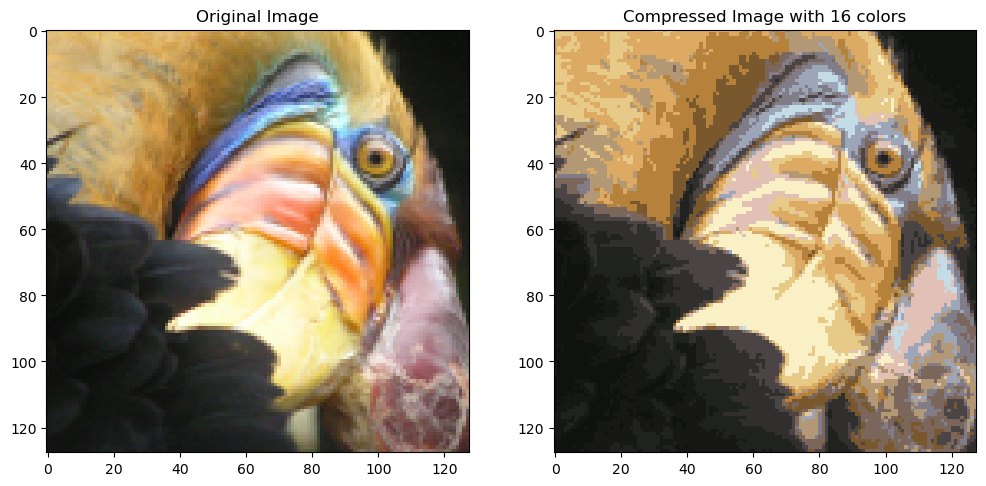

In [34]:
I = sio.loadmat("bird_small.mat")['A']
I = I / 255.0
# Hago que la imagen se transforme en una matriz de m (que con el -1 se cancula) que son los pixeles de la imagen y 3 que son los 3 valores RGB
X_img = I.reshape(-1, 3)
K = 16
# Aplico el Kmeans
initial_centroids = kMeansInitCentroids(X_img, K)
centroids, idx = runKmeans(X_img, initial_centroids, 10)

# Pongo cada pixel al valor de su centroide mas cercano
X_recovered = centroids[idx.astype(int), :]

# Reformo la matriz que he creado antes en la imagen 
A_recovered = X_recovered.reshape(I.shape)

# Funciones para mostrar las dos imagenes
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(I)
ax[0].set_title('Original Image')
ax[1].imshow(A_recovered)
ax[1].set_title('Compressed Image with 16 colors')
plt.show()

#### PROBLEMA 03.
Repetir el P2 usando en este caso el algoritmo K-Means de la librería sklearn.

##### Solución:

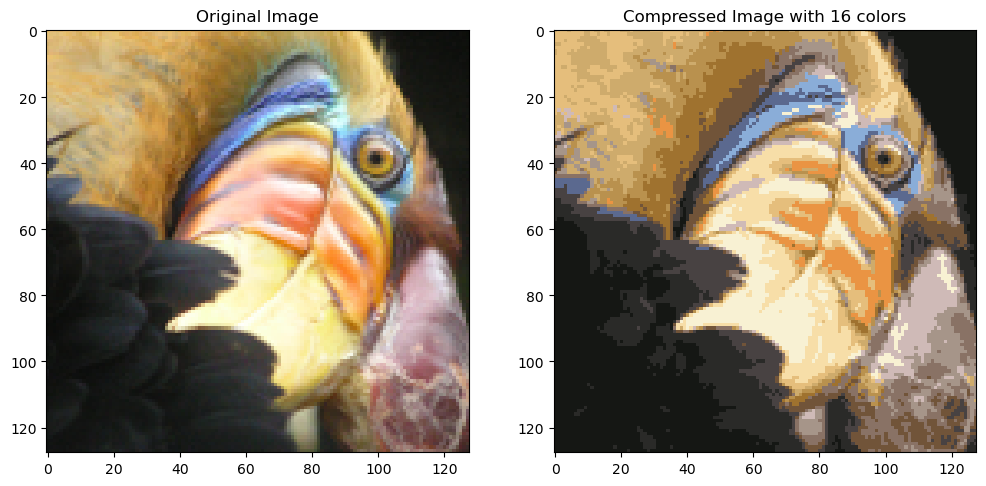

In [35]:
# Aplicar el algoritmo K-Means de sklearn para comprimir la imagen
kmeans = KMeans(n_clusters=K, init='k-means++', random_state=42)
kmeans.fit(X_img)
idx = kmeans.predict(X_img)
centroids = kmeans.cluster_centers_

# Poner cada pixel al valor de su centroide más cercano
X_recovered = centroids[idx.astype(int), :]

# Reformar la matriz que he creado antes en la imagen 
A_recovered = X_recovered.reshape(I.shape)

# Funciones para mostrar las dos imágenes
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(I)
ax[0].set_title('Original Image')
ax[1].imshow(A_recovered)
ax[1].set_title('Compressed Image with 16 colors')
plt.show()